In [1]:
from datetime import datetime, timedelta

import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from util.stock_loader import Loader

In [2]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ADBE', 'ADYEY', 'AMD', 'AMZN', 'ANET',
    'ASML', 'AXON', 'BROS', 'BYND', 'CHWY', 'CRWD', 'DDOG', 'DOCS',
    'DOCU', 'DUOL', 'EDIT', 'ETSY', 'FLGT', 'GH', 'GMED', 'GOOG',
    'IDXX', 'INTG', 'ISRG', 'JD', 'LSPD', 'LULU', 'MDB', 'MELI', 'MNST',
    'MSFT', 'MTCH', 'NVCR', 'NVDA', 'OKTA', 'OPEN', 'PAC', 'PANW',
    'PAYC', 'PINS', 'PYPL', 'QDEL', 'RBLX', 'RDFN', 'RGEN', 'RIVN',
    'ROKU', 'RVLV', 'SE', 'SHOP', 'SNOW', 'TASK', 'TDOC', 'TEAM',
    'TREX', 'TTD', 'TTWO', 'TWLO', 'TWTR', 'TYL', 'UPST', 'VEEV', 'VLD',
    'XPEV', 'ZEN', 'ZM']
LINGERERS = [
    'AMEH', 'BYRN', 'FCPT', 'FCUV', 'INTZ', 'MNMD', 'RVP', 'ZYXI']
BEST_WEIGHTED = [
    'AMRK', 'APT', 'CELH', 'EP', 'GBOX', 'GCBC', 
    'GME', 'IEI', 'MCVT', 'MICS', 'OMQS', 'ORLA', 'POWW', 'PRPH',
    'SBOW', 'VIRT', 'VIVO', 'WAVD', 'WKHS']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)
len(SYMBOLS)

69

In [3]:
N_YEARS = 10 # 5
N_DAYS = int(round(365.25 * N_YEARS))
END = (datetime.now() + timedelta(1)).date()
START = str(END - timedelta(N_DAYS))
START, END

('2012-09-10', datetime.date(2022, 9, 10))

In [4]:
batch = (
    sorted(list(set(SYMBOLS + LINGERERS + BEST_WEIGHTED))) + INDICES) # run all
stock_loader = Loader(batch, START, str(END), verbose=True)
data = stock_loader.download().rename(columns={'Adj Close': 'AdjClose'})

[*********************100%***********************]  99 of 99 completed
Generating derived columns...
AAPL... ABMD... ABNB... ADBE... ADYEY... AMD... AMEH... AMRK... AMZN... ANET... APT... ASML... AXON... BROS... BYND... BYRN... CELH... CHWY... CRWD... DDOG... DOCS... DOCU... DUOL... EDIT... EP... ETSY... FCPT... FCUV... FLGT... GBOX... GCBC... GH... GME... GMED... GOOG... IDXX... IEI... INTG... INTZ... ISRG... JD... LSPD... LULU... MCVT... MDB... MELI... MICS... MNMD... MNST... MSFT... MTCH... NVCR... NVDA... OKTA... OMQS... OPEN... ORLA... PAC... PANW... PAYC... PINS... POWW... PRPH... PYPL... QDEL... RBLX... RDFN... RGEN... RIVN... ROKU... RVLV... RVP... SBOW... SE... SHOP... SNOW... TASK... TDOC... TEAM... TREX... TTD... TTWO... TWLO... TWTR... TYL... UPST... VEEV... VIRT... VIVO... VLD... WAVD... WKHS... XPEV... ZEN... ZM... ZYXI... ^GSPC... ^IXIC... ^NYA... 


In [5]:
data['Date'].tail()

2512   2022-09-02
2513   2022-09-06
2514   2022-09-07
2515   2022-09-08
2516   2022-09-09
Name: Date, dtype: datetime64[ns]

In [6]:
spx = data['DayToDayChange']['^GSPC']
spx = spx[1:]
#spx = spx / spx[1]
spx

1       1.003135
2       1.002093
3       1.016310
4       1.003959
5       0.996875
          ...   
2512    0.989263
2513    0.995905
2514    1.018341
2515    1.006611
2516    1.015271
Name: ^GSPC, Length: 2516, dtype: float64

In [7]:
data['DayToDayChange'].quantile(q=[0.75], axis=1).T[1:]

,0.75
1,1.003993
2,1.002859
3,1.017467
4,1.011226
5,1.001768
...,...
2512,0.999511
2513,1.003075
2514,1.039607
2515,1.028742


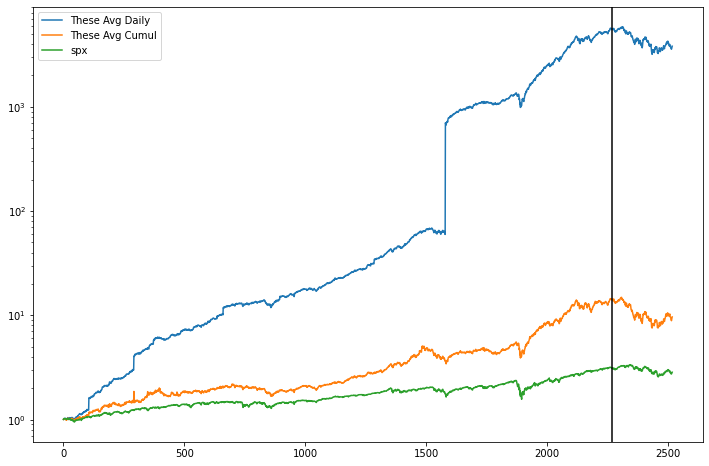

In [8]:
plt.figure(figsize=[12, 8])
plt.plot(data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
         label='These Avg Daily')
plt.plot(data['DayToDayChange'].cumprod().mean(axis=1),
         label='These Avg Cumul')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

In [9]:
out = pd.DataFrame(data.Date)
out['mine1'] = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
out['mine2'] = data['DayToDayChange'].cumprod().mean(axis=1)
out.head()

,Date,mine1,mine2
0,2012-09-10,NaN,NaN
1,2012-09-11,1.005627,1.005627
2,2012-09-12,1.000562,1.000732
3,2012-09-13,1.011303,1.009866
4,2012-09-14,1.016207,1.014877


In [10]:
out.tail()

,Date,mine1,mine2
2512,2022-09-02,3602.845587,9.002191
2513,2022-09-06,3562.360380,8.879306
2514,2022-09-07,3652.527706,9.178033
2515,2022-09-08,3709.512712,9.431576
2516,2022-09-09,3809.412261,9.648954


In [11]:
!ls ../data

all_symbols.pkl             nasdaq_sharpes_by_state.csv
dev_quantiles.csv           nya1965.csv
historic.csv                pct_params
hmm_exp_returns.csv         scoring.csv
mine.csv                    sharpes_by_state.csv
myHistoric.RData            sp1950.csv
myHistoricTest.RData        wilshire1990.csv
nasdaq1965.csv


In [12]:
out.iloc[1:, :].to_csv('../data/mine.csv', index=False)

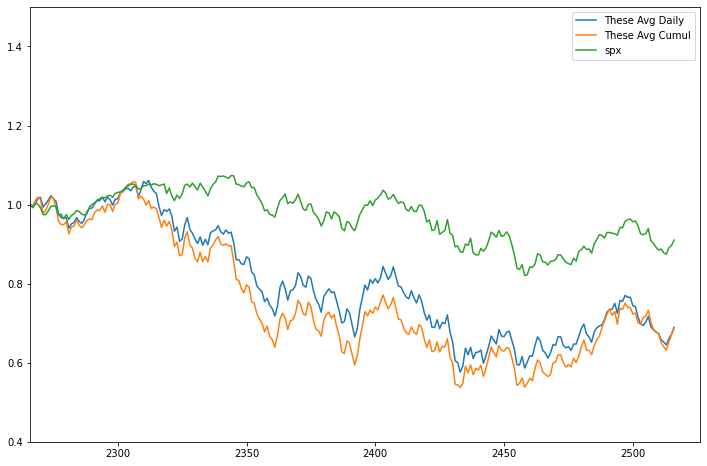

In [13]:
plt.figure(figsize=[12, 8])
a = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
n = len(a)
start = n - 250
a = a / a[start]
b = data['DayToDayChange'].cumprod().mean(axis=1)
b = b / b[start]
s = spx.cumprod()
s = s / s[start]
plt.plot(a, label='These Avg Daily')
plt.plot(b, label='These Avg Cumul')
plt.plot(s, label='spx')
#plt.yscale('log')
plt.xlim([one_year, n + 10])
plt.ylim(0.4, 1.5)
plt.legend();

In [14]:
def get_stock_data(stock, data, n_days=60):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (sub.Value[stock][sub.Value[stock].notna()]
                   .index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    if len(sub) > n_days:
        sub = sub.iloc[-n_days:, :]
    return sub

In [15]:
rblx = get_stock_data('SE', data)
rblx.head()

,Value,Close,High,Low,Open,LogValue,IntradayChange,DayToDayChange,OvernightChange
2457,75.680000,75.680000,77.459999,71.519997,71.750000,4.326514,1.054774,1.066667,1.011276
2458,69.029999,69.029999,72.870003,67.980003,69.930000,4.234541,0.987130,0.912130,0.924022
2459,70.199997,70.199997,72.214996,67.900002,70.559998,4.251348,0.994898,1.016949,1.022164
2460,72.870003,72.870003,75.779999,71.660004,72.050003,4.288677,1.011381,1.038034,1.026353
2461,71.279999,71.279999,73.190002,69.670998,69.989998,4.266616,1.018431,0.978180,0.960477


In [16]:
rblx = rblx[['Value', 'Close', 'High', 'Low']]
rblx.head()

,Value,Close,High,Low
2457,75.680000,75.680000,77.459999,71.519997
2458,69.029999,69.029999,72.870003,67.980003
2459,70.199997,70.199997,72.214996,67.900002
2460,72.870003,72.870003,75.779999,71.660004
2461,71.279999,71.279999,73.190002,69.670998


In [17]:
rblx['NextHigh'] = rblx.High.shift(-1)
rblx['NextLow'] = rblx.Low.shift(-1)
rblx['HighMult'] = rblx.NextHigh / rblx.Close
rblx['LowMult'] = rblx.NextLow / rblx.Close
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult
2457,75.680000,75.680000,77.459999,71.519997,72.870003,67.980003,0.962870,0.898256
2458,69.029999,69.029999,72.870003,67.980003,72.214996,67.900002,1.046139,0.983630
2459,70.199997,70.199997,72.214996,67.900002,75.779999,71.660004,1.079487,1.020798
2460,72.870003,72.870003,75.779999,71.660004,73.190002,69.670998,1.004391,0.956100
2461,71.279999,71.279999,73.190002,69.670998,78.785004,69.879997,1.105289,0.980359


0.05    0.978103
Name: HighMult, dtype: float64


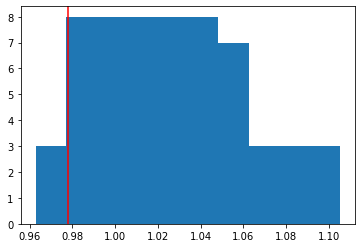

In [18]:
# For selling:
high_05 = rblx.HighMult.quantile(q=[0.05])
print(high_05)
plt.hist(rblx.HighMult)
plt.axvline(x=high_05[0.05], color='red');

1.0164908284855454


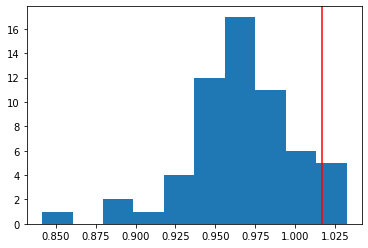

In [19]:
# For buying:
low_95 = rblx.LowMult.quantile(q=[0.95])
print(low_95.tolist()[0])
plt.hist(rblx.LowMult)
plt.axvline(x=low_95[0.95], color='red');

In [20]:
def get_hilo_mult(stock, ci=0.95):
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    sell_pt = stock.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt = stock.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt, sell_pt

In [21]:
get_hilo_mult(rblx)

(1.0164908284855454, 0.9781029416744824)

In [22]:
aapl = get_stock_data('AAPL', data)
get_hilo_mult(aapl)

(1.010964085404983, 0.9954219136997144)

In [23]:
def get_macd(stock_data, fast=60, slow=90, signal=80):
    df = stock_data.copy()
    exp1 = df.Value.ewm(span=fast, adjust=False).mean()
    exp2 = df.Value.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    return is_rising

In [24]:
rblx['Trend'] = get_macd(rblx)
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult,Trend
2457,75.680000,75.680000,77.459999,71.519997,72.870003,67.980003,0.962870,0.898256,0
2458,69.029999,69.029999,72.870003,67.980003,72.214996,67.900002,1.046139,0.983630,0
2459,70.199997,70.199997,72.214996,67.900002,75.779999,71.660004,1.079487,1.020798,0
2460,72.870003,72.870003,75.779999,71.660004,73.190002,69.670998,1.004391,0.956100,0
2461,71.279999,71.279999,73.190002,69.670998,78.785004,69.879997,1.105289,0.980359,0


In [25]:
def get_hilo_mults(stock, ci=0.95):
    stock['Trend'] = get_macd(stock)
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    upward = stock[stock.Trend == 1]
    downward = stock[stock.Trend == 0]
    sell_pt_up = upward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_up = upward.LowMult.quantile(q=[ci]).tolist()[0]
    sell_pt_down = downward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_down = downward.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt_up, sell_pt_up, buy_pt_down, sell_pt_down

In [26]:
get_hilo_mults(rblx)

(1.0106572120510435,
 0.9815012316053279,
 1.0210274462569144,
 0.9754538275853842)

In [27]:
get_hilo_mults(aapl)

(1.0103035903816315,
 0.9973163012854853,
 1.0070155173419806,
 0.9910879212129174)

In [28]:
out = []
for symbol in batch:
    stock = get_stock_data(symbol, data)
    mults = get_hilo_mults(stock)
    out.append([symbol, *mults])
df = pd.DataFrame(
    out, 
    columns=['stock', 'buy_pt_up', 'sell_pt_up', 'buy_pt_down', 
             'sell_pt_down'])
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down
0,AAPL,1.010304,0.997316,1.007016,0.991088
1,ABMD,1.002127,0.995792,1.008277,0.988046
2,ABNB,1.017644,0.989785,1.011546,0.989006
3,ADBE,1.005400,0.993110,1.010772,0.995814
4,ADYEY,1.036767,0.970524,1.024938,0.963892


In [29]:
last = data.index.max()
price = pd.DataFrame(data.loc[last, 'Value'])
price.columns = ['price']
price['stock'] = price.index
price

,price,stock
AAPL,157.369995,AAPL
ABMD,282.279999,ABMD
ABNB,123.480003,ABNB
ADBE,394.779999,ADBE
ADYEY,14.99,ADYEY
...,...,...
ZM,82.620003,ZM
ZYXI,9.42,ZYXI
^GSPC,4067.360107,^GSPC
^IXIC,12112.306641,^IXIC


In [30]:
df = df.merge(price, how='left', on='stock')
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down,price
0,AAPL,1.010304,0.997316,1.007016,0.991088,157.369995
1,ABMD,1.002127,0.995792,1.008277,0.988046,282.279999
2,ABNB,1.017644,0.989785,1.011546,0.989006,123.480003
3,ADBE,1.005400,0.993110,1.010772,0.995814,394.779999
4,ADYEY,1.036767,0.970524,1.024938,0.963892,14.99


In [31]:
df.to_csv('mults.csv', index=False)
!open ./mults.csv